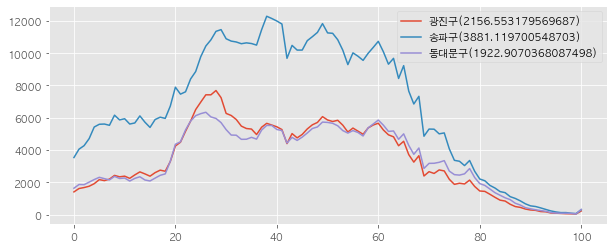

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('202012_202012_연령별인구현황_월간.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
total = next(data)
target = '광진구'
cmp = {}
num = {}
sse = {}

for row in data:
    location = row[0].split()[1]
    if location == target:
        cmp[target] = []
        for i in range(3,len(row)):
            cmp[target].append(int((row[i]).replace(',','')))
    else:
        num[location] = []
        for i in range(3,len(row)):
            num[location].append(int((row[i]).replace(',','')))

for loc in num:
    sum=0
    for i in range(len(num)):
        sum+=np.sum((num[loc][i]-cmp[target][i])**2)
        sse[loc] = sum
    
f.close()
max_sse = max(sse,key=sse.get)
min_sse = min(sse,key=sse.get)

plt.figure(figsize=(10,4))
plt.style.use('ggplot')
plt.rc('font', family='AppleGothic')
plt.plot(cmp[target], label=target+'({})'.format(str(np.std(cmp[target]))))
plt.plot(num[max_sse], label=max_sse+'({})'.format(str(np.std(num[max_sse]))))
plt.plot(num[min_sse], label=min_sse+'({})'.format(str(np.std(num[min_sse]))))
plt.legend()
plt.show()